<a href="https://colab.research.google.com/github/szh141/mlproject/blob/main/medical_cost_prediction_20240626.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://medium.com/@iabbasali/medical-cost-prediction-using-machine-learning-63aca6bf2ad5

In [2]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Colab images/Data/insurance.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [9]:
cat_cols = [col for col in df.columns if df[col].dtype == 'object']
num_cols = [col for col in df.columns if df[col].dtype in ['int', 'float']]
# df[num_cols]

In [10]:
df.replace({'sex':{'male':1, 'female':0}}, inplace=True)
df.replace({'smoker':{'yes':1, 'no':0}}, inplace=True)
df.replace({'region':{'southeast':1, 'southwest':2, 'northwest':3, 'northeast':4}}, inplace=True)

<Axes: >

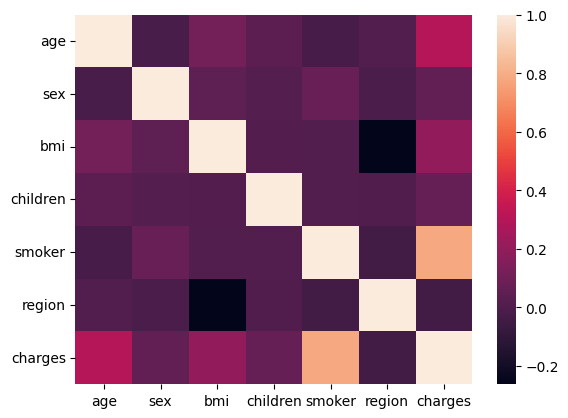

In [12]:
import seaborn as sns
sns.heatmap(df.corr())

In [13]:
X = df.drop(columns=['charges'])
y = df['charges']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=897)

Linear Regression

vs

Random Forest Regressor

In [15]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_prediction = lr.predict(X_test)

from sklearn.metrics import r2_score, mean_absolute_error
print(f"MAE: {mean_absolute_error(y_test, lr_prediction)}, \nR2-Score: {r2_score(y_test, lr_prediction)}")

MAE: 4563.273374278861, 
R2-Score: 0.7569282584086896


In [16]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
rf_prediction = rf.predict(X_test)

print(f"MAE: {mean_absolute_error(y_test, rf_prediction)}, \nR2-Score: {r2_score(y_test, rf_prediction)}")

MAE: 2682.121152874061, 
R2-Score: 0.8530603976119396
